In [1]:
import numpy as np
import sys
from sklearn.cluster import KMeans as sKMeans
from sklearn_extra.cluster import KMedoids
from math import atan2, cos, sin, sqrt
import matplotlib.pyplot as plt
from random import sample
import scipy as sp

%matplotlib inline
%load_ext autoreload

In [2]:
sys.path.append("/home/gmancini/Dropbox/appunti/Clustering/src")
import mdutils
import myclusters
import mymetrics
%autoreload 2

In [3]:
data = np.array(((1,1),(1,2),(1,3),(2,1),(2,2),(3,1),(3,2),(3,3),(2,3),\
                (5,5),(6,5),(7,5),(4,6),(5,6),(6,6),(5,7),(6,7),(7,7)))
data.shape = (18,2)
data

array([[1, 1],
       [1, 2],
       [1, 3],
       [2, 1],
       [2, 2],
       [3, 1],
       [3, 2],
       [3, 3],
       [2, 3],
       [5, 5],
       [6, 5],
       [7, 5],
       [4, 6],
       [5, 6],
       [6, 6],
       [5, 7],
       [6, 7],
       [7, 7]])

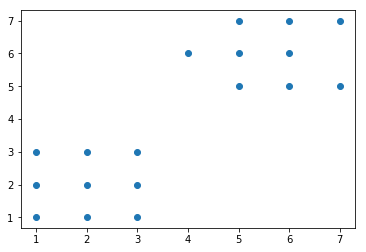

In [4]:
plt.scatter(data[:,0],data[:,1])

In [5]:
D = sp.spatial.distance.squareform(sp.spatial.distance.pdist(data,metric='cityblock'))

In [6]:
a = np.arange(18,dtype='int')
mask = np.zeros(18,dtype='int')
mask[7] = 1
mask[16] = 1
U = np.ma.array(a,mask=mask)
U

masked_array(data=[0, 1, 2, 3, 4, 5, 6, --, 8, 9, 10, 11, 12, 13, 14, 15,
                   --, 17],
             mask=[False, False, False, False, False, False, False,  True,
                   False, False, False, False, False, False, False, False,
                    True, False],
       fill_value=999999)

In [7]:
for j,xj in enumerate(U[U!=np.ma.masked]):
    print( j,xj)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 8
8 9
9 10
10 11
11 12
12 13
13 14
14 15
15 17


In [8]:
D.shape

(18, 18)

In [9]:
for i in D: print(np.sum(i))

105.0
93.0
87.0
93.0
81.0
87.0
75.0
69.0
75.0
71.0
79.0
93.0
75.0
77.0
85.0
89.0
97.0
111.0


In [10]:
for h,H in enumerate(U): print(h,H)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 --
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 --
17 17


In [11]:
S = [7,16]
data[S]

array([[3, 3],
       [6, 7]])

In [12]:
DD = D[S].T
DD.shape

(18, 2)

In [13]:
np.min(DD), np.min(DD,axis=0)

(0.0, array([0., 0.]))

In [14]:
#DD

In [15]:
#np.argsort(DD,axis=1)

In [16]:
my_estimator = myclusters.PAM(K=2,niter=1000,metric='precomputed')
a,b,c=my_estimator.do_clustering(D=D)

BUILD [7, 16] [0 1 2 3 4 5 6 -- 8 9 10 11 12 13 14 15 -- 17]
1 -26.0
2 0.0
SWAP [7, 9] [0 1 2 3 4 5 6 -- 8 -- 10 11 12 13 14 15 16 17] 2 1 8 9


In [17]:
np.sum(D[[7,9]]),np.sum(D[[7,16]]),np.sum(D[[4,14]]),np.sum(D[[6,8]])

(140.0, 166.0, 166.0, 150.0)